The potential $V$ is measured in units of $\frac{\hbar^{2}}{2\mu (1\text{nm})^{2}}$. The oscillator length is $a_{z} = \sqrt{\frac{\hbar}{\mu\omega_{z}}}$, the dipole length is $a_{dd} = \frac{\mu_{0}}{12\pi}(10\mu_{B})^{2}\frac{m}{\hbar^{2}} = \frac{\mu_{0}}{6\pi}(10\mu_{B})^{2}\frac{\mu}{\hbar^{2}} = 6.96 \text{ nm}$ and the Van der Waals length is, as in Julienne's paper (https://journals.aps.org/rmp/pdf/10.1103/RevModPhys.82.1225) $r_{vdw} = \frac{1}{2}\left(2\mu C_{6}/\hbar^{2}\right) = 4.26\text{ nm}$ if I take Nascimbene's paper (https://iopscience.iop.org/article/10.1088/1361-6455/50/1/014005/pdf) where $C_{6} = 2273 E_{h}a_{0}^{6}$.

This transforms the equation:
\[
V(\rho, z) = \frac{1}{2}\mu\omega_{z}^{2}z^{2} + \frac{\hbar^{2}(m^{2}-1/4)}{2\mu\rho^{2}}-\frac{C_{6}}{r^{6}}+\frac{\mu_{0}}{4\pi}(10\mu_{B})^{2}\frac{1-3\cos^{2}\theta}{r^{3}}
\]
into
\[
V(\rho, z) = \frac{V}{\frac{\hbar^{2}}{2\mu (1\text{nm})^{2}}} = \frac{1}{a_{z}^{4}}z^{2} + \frac{m^{2}}{\rho^{2}}-\frac{(2r_{vdw})^{4}}{(z^{2}+\rho^{2})^{3}}+3a_{dd}\frac{1-3\frac{z^{2}}{z^{2}+\rho^{2}}}{(z^{2}+\rho^{2})^{3/2}}
\]

In [41]:
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt
# 100 a_0 / a_dd = 5 / 3.5
# a_dd_Dy = 6.96
# a_vdw_Dy = 4.26

a_dd_Dy = 6.96
a_vdw_Dy = 4.26

def V(rho, z, m, a_z, a_dd = a_dd_Dy, r_vdw = a_vdw_Dy):
    return (1/a_z)**4*z**2 + m**2/rho**2-(2*r_vdw)**4/(z**2+rho**2)**3+3*a_dd*(1-3*(z**2/(z**2+rho**2)))/(z**2+rho**2)**(3/2)

def dVdz(rho, z, m, a_z, a_dd = a_dd_Dy, r_vdw = a_vdw_Dy):
    return z*(2/(a_z**4) + 6*(2*r_vdw)**4/(z**2+rho**2)**4 + 9*a_dd*(2*z**2-3*rho**2)/((z**2+rho**2)**(7/2)))

def dVdrho(rho, z, m, a_z, a_dd = a_dd_Dy, r_vdw = a_vdw_Dy):
    return -2*m**2/rho**3 + 6*(2*r_vdw)**4*rho/(z**2+rho**2)**4 - 9*a_dd*rho*(-4*z**2+rho**2)/(z**2+rho**2)**(7/2)

def derivativeV(rho, z, m, a_z, a_dd = a_dd_Dy, r_vdw = a_vdw_Dy):
    return [dVdz(rho, z, m, a_z, a_dd, r_vdw), dVdrho(rho, z, m, a_z, a_dd, r_vdw)]

In [42]:
derivativeV(1,1,1,1)

[1972.475668463309, 1990.6222528500716]

In [58]:
def SaddlePosition(m, a_z, a_dd = a_dd_Dy, r_vdw = a_vdw_Dy):
    def currentDerivativeV(r):
        rho, z = r
        return derivativeV(rho, z, m, a_z, a_dd, r_vdw)
    sol = root(currentDerivativeV, [10, 10], method='lm')
    return sol.x

In [59]:
NbIteration = 100
azList = 0.0 + np.array(list(range(NbIteration)))/10
SaddlePosition_M0 = [] 
SaddlePosition_M1 = []
SaddlePosition_M2 = []
SaddleHeight_M0 = [] 
SaddleHeight_M1 = [] 
SaddleHeight_M2 = [] 

for a_z in azList:
    result_M0 = SaddlePosition(0, a_z)
    result_M1 = SaddlePosition(1, a_z)
    result_M2 = SaddlePosition(2, a_z)
    SaddlePosition_M0 += [result_M0]
    SaddlePosition_M1 += [result_M1]
    SaddlePosition_M2 += [result_M2]
    SaddleHeight_M0 += [V(result_M0[0],result_M0[1], 0, a_z)]
    SaddleHeight_M1 += [V(result_M1[0],result_M1[1], 1, a_z)]
    SaddleHeight_M2 += [V(result_M2[0],result_M2[1], 2, a_z)]
SaddlePosition_M0 = np.array(SaddlePosition_M0)
SaddlePosition_M1 = np.array(SaddlePosition_M1)
SaddlePosition_M2 = np.array(SaddlePosition_M2)
SaddleHeight_M0 = np.array(SaddleHeight_M0)
SaddleHeight_M1 = np.array(SaddleHeight_M1)
SaddleHeight_M2 = np.array(SaddleHeight_M2)


SaddlePosition_M0_noC6 = [] 
SaddlePosition_M1_noC6 = []
SaddlePosition_M2_noC6 = []
SaddleHeight_M0_noC6 = [] 
SaddleHeight_M1_noC6 = [] 
SaddleHeight_M2_noC6 = [] 

for a_z in azList:
    result_M0_noC6 = SaddlePosition(0, a_z, r_vdw = 0)
    result_M1_noC6 = SaddlePosition(1, a_z, r_vdw = 0)
    result_M2_noC6 = SaddlePosition(2, a_z, r_vdw = 0)
    SaddlePosition_M0_noC6 += [result_M0_noC6]
    SaddlePosition_M1_noC6 += [result_M1_noC6]
    SaddlePosition_M2_noC6 += [result_M2_noC6]
    SaddleHeight_M0_noC6 += [V(result_M0_noC6[0],result_M0_noC6[1], 0, a_z, r_vdw = 0)]
    SaddleHeight_M1_noC6 += [V(result_M1_noC6[0],result_M1_noC6[1], 1, a_z, r_vdw = 0)]
    SaddleHeight_M2_noC6 += [V(result_M2_noC6[0],result_M2_noC6[1], 2, a_z, r_vdw = 0)]
SaddlePosition_M0_noC6 = np.array(SaddlePosition_M0_noC6)
SaddlePosition_M1_noC6 = np.array(SaddlePosition_M1_noC6)
SaddlePosition_M2_noC6 = np.array(SaddlePosition_M2_noC6)
SaddleHeight_M0_noC6 = np.array(SaddleHeight_M0_noC6)
SaddleHeight_M1_noC6 = np.array(SaddleHeight_M1_noC6)
SaddleHeight_M2_noC6 = np.array(SaddleHeight_M2_noC6)

<ipython-input-41-95eef2ba465c>:15: RuntimeWarning: divide by zero encountered in double_scalars
  return z*(2/(a_z**4) + 6*(2*r_vdw)**4/(z**2+rho**2)**4 + 9*a_dd*(2*z**2-3*rho**2)/((z**2+rho**2)**(7/2)))
<ipython-input-56-04de45c0d898>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (1/a_z)**4*z**2 + (m**2)/rho**2-(2*r_vdw)**4/(z**2+rho**2)**3+3*a_dd*(1-3*(z**2/(z**2+rho**2)))/(z**2+rho**2)**(3/2)


In [60]:
azList

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

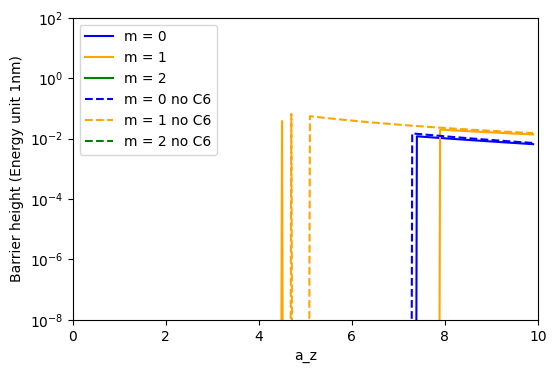

In [61]:
plt.figure(dpi = 100)
plt.semilogy(azList, SaddleHeight_M0, label = "m = 0", color = 'blue')
plt.semilogy(azList, SaddleHeight_M1, label = "m = 1", color = 'orange')
plt.semilogy(azList, SaddleHeight_M2, label = "m = 2", color = 'green')
plt.semilogy(azList, SaddleHeight_M0_noC6, '--', label = "m = 0 no C6", color = 'blue')
plt.semilogy(azList, SaddleHeight_M1_noC6, '--', label = "m = 1 no C6", color = 'orange')
plt.semilogy(azList, SaddleHeight_M2_noC6, '--', label = "m = 2 no C6", color = 'green')
plt.legend()
plt.xlabel("a_z")
plt.ylabel("Barrier height (Energy unit 1nm)")
plt.xlim(0,10)
plt.ylim(10**(-8),100)
plt.show()

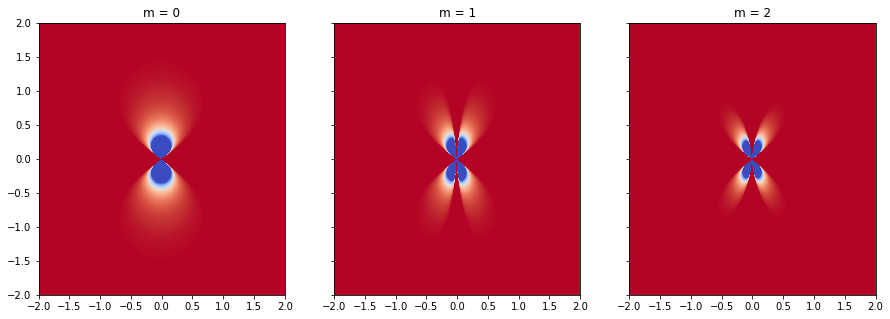

In [15]:
rho_lim = 2
z_lim = 2
rho, z = np.meshgrid(np.linspace(-rho_lim, rho_lim, 1000), np.linspace(-z_lim, z_lim, 1000))
potential_0 = V(rho, z, 0, 10)
potential_1 = V(rho, z, 1, 10)
potential_2 = V(rho, z, 2, 10)

fig = plt.figure(figsize = (15,5))
gs = fig.add_gridspec(1, 3, hspace=1)
ax1, ax2, ax3 = gs.subplots(sharex=True, sharey=True)
c1 = ax1.pcolormesh(rho, z, potential_0, cmap='coolwarm', shading='nearest', vmin=-1000, vmax=-10)
c2 = ax2.pcolormesh(rho, z, potential_1, cmap='coolwarm', shading='nearest', vmin=-1000, vmax=-10)
c2 = ax3.pcolormesh(rho, z, potential_2, cmap='coolwarm', shading='nearest', vmin=-1000, vmax=-10)
ax1.set_title('m = 0')
ax2.set_title('m = 1')
ax3.set_title('m = 2')
ax1.axis([-rho_lim, rho_lim, -z_lim, z_lim])
#fig.colorbar(c1)
#cbaxes = fig.add_axes([1, 1, 1, 1]) 
#cb = plt.colorbar(ax, cax = cbaxes)

plt.show()

In [16]:
potential_0.min()

-460004396.9002943

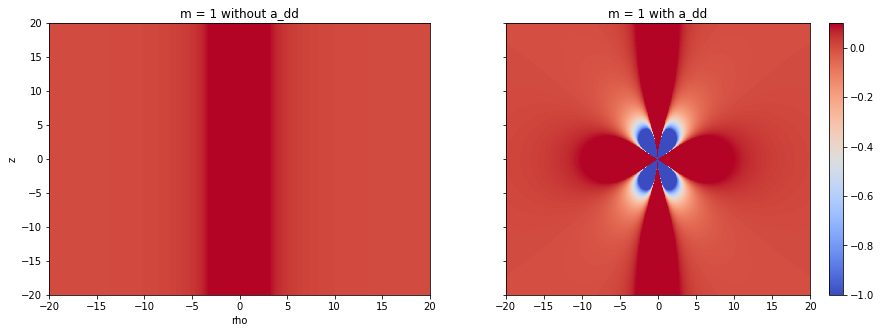

In [17]:
def V(rho, z, m, a_z, a_dd = a_dd_Dy, r_vdw = a_vdw_Dy):
    return (1/a_z)**4*z**2 + m**2/rho**2-(2*r_vdw)**4/(z**2+rho**2)**3+3*a_dd*(1-3*(z**2/(z**2+rho**2)))/(z**2+rho**2)**(3/2)



rho_lim = 20
z_lim = 20
rho, z = np.meshgrid(np.linspace(-rho_lim, rho_lim, 1000), np.linspace(-z_lim, z_lim, 1000))
potential_0 = V(rho, z, 1, np.infty, a_dd = 0)
potential_1 = V(rho, z, 1, np.infty, a_dd = 30)
fig = plt.figure(figsize = (15,5))
gs = fig.add_gridspec(1, 2, hspace=1)
ax1, ax2 = gs.subplots(sharex=True, sharey=True)
c1 = ax1.pcolormesh(rho, z, potential_0, cmap='coolwarm', shading='nearest', vmin=-1, vmax=0.1)
c2 = ax2.pcolormesh(rho, z, potential_1, cmap='coolwarm', shading='nearest', vmin=-1, vmax=0.1)
ax1.set_title('m = 1 without a_dd')
ax2.set_title('m = 1 with a_dd')
ax1.set_xlabel('rho')
ax1.set_ylabel('z')
ax1.axis([-rho_lim, rho_lim, -z_lim, z_lim])
fig.colorbar(c1)
#cbaxes = fig.add_axes([1, 1, 1, 1]) 
#cb = plt.colorbar(ax3)#, cax = cbaxes)

plt.show()

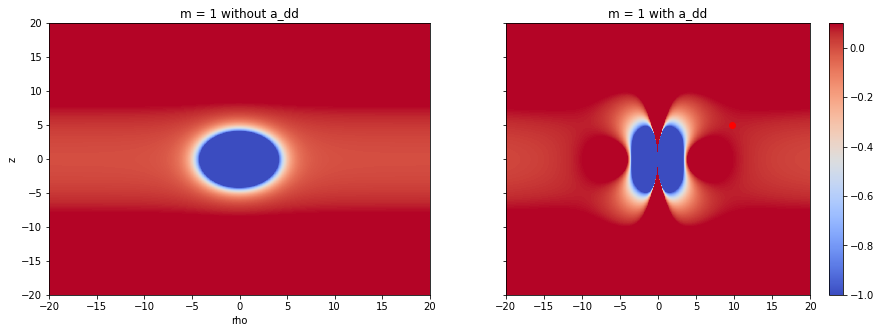

In [64]:
def V(rho, z, m, a_z, a_dd = a_dd_Dy, r_vdw = a_vdw_Dy):
    return (1/a_z)**4*z**2 + (m**2)/rho**2-(2*r_vdw)**4/(z**2+rho**2)**3+3*a_dd*(1-3*(z**2/(z**2+rho**2)))/(z**2+rho**2)**(3/2)

def SaddlePosition(m, a_z, a_dd = a_dd_Dy, r_vdw = a_vdw_Dy):
    def currentDerivativeV(r):
        rho, z = r
        return derivativeV(rho, z, m, a_z, a_dd, r_vdw)
    sol = root(currentDerivativeV, [1, 1], method='lm')
    return sol.x

Saddle = SaddlePosition(1, 5, a_dd = 30)

rho_lim = 20
z_lim = 20
rho, z = np.meshgrid(np.linspace(-rho_lim, rho_lim, 1000), np.linspace(-z_lim, z_lim, 1000))
potential_0 = V(rho, z, 0, 5, a_dd = 0)
potential_1 = V(rho, z, 1, 5, a_dd = 30)
fig = plt.figure(figsize = (15,5))
gs = fig.add_gridspec(1, 2, hspace=1)
ax1, ax2 = gs.subplots(sharex=True, sharey=True)
c1 = ax1.pcolormesh(rho, z, potential_0, cmap='coolwarm', shading='nearest', vmin=-1, vmax=0.1)
c2 = ax2.pcolormesh(rho, z, potential_1, cmap='coolwarm', shading='nearest', vmin=-1, vmax=0.1)
ax2.plot(Saddle[0], Saddle[1], 'ro')
ax1.set_title('m = 1 without a_dd')
ax2.set_title('m = 1 with a_dd')
ax1.set_xlabel('rho')
ax1.set_ylabel('z')
ax1.axis([-rho_lim, rho_lim, -z_lim, z_lim])
fig.colorbar(c1)
#cbaxes = fig.add_axes([1, 1, 1, 1]) 
#cb = plt.colorbar(ax3)#, cax = cbaxes)

plt.show()

In [65]:
Saddle

array([9.74950044, 4.997396  ])